# Case Técnico – Análise dos Preços do Cobre (LME)

Este notebook consolida os preços diários do cobre (Cash Seller) da London Metal Exchange
entre 02/01/2020 e 31/12/2025.

Objetivos:
- Construir série contínua e validada
- Calcular estatísticas principais
- Produzir gráficos solicitados
- Analisar a trajetória dos preços

In [4]:
# Importação de bibliotecas

import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 1. Leitura e Consolidação dos Dados

Os arquivos mensais foram consolidados em uma única estrutura
contendo apenas as colunas de data e preço do cobre.

In [5]:
# Caminho da pasta
path = r"C:\Users\otavi\Downloads\lme_prices (1)\prices"

# Lista de arquivos
files = glob.glob(os.path.join(path, "*.xlsx"))

df_list = []

for file in files:
    
    raw = pd.read_excel(file, header=None)
    
    # Identifica linhas com datas válidas
    mask = pd.to_datetime(raw[1], errors="coerce").notna()
    temp = raw[mask].copy()
    
    # Seleciona data e preço
    temp = temp[[1, 2]]
    temp.columns = ["Date", "Price"]
    
    temp["Date"] = pd.to_datetime(temp["Date"], errors="coerce")
    temp["Price"] = pd.to_numeric(temp["Price"], errors="coerce")
    
    temp = temp.dropna()
    
    df_list.append(temp)

# Consolidação final
df_final = pd.concat(df_list, ignore_index=True)
df_final = df_final.sort_values("Date").set_index("Date")

df_final.head()## 2. Validação da Série

C:\Users\otavi\AppData\Local\Temp\ipykernel_13088\3551055216.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mask = pd.to_datetime(raw[1], errors="coerce").notna()
C:\Users\otavi\AppData\Local\Temp\ipykernel_13088\3551055216.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mask = pd.to_datetime(raw[1], errors="coerce").notna()
C:\Users\otavi\AppData\Local\Temp\ipykernel_13088\3551055216.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mask = pd.to_datetime(raw[1], errors="coerce").notna()
C:\Users\otavi\AppData\Local\Temp\ipykernel_13088\3551055216.py:14: UserW

,Price
Date,
2020-01-02,6165.0
2020-01-03,6075.0
2020-01-06,6097.0
2020-01-07,6134.0
2020-01-08,6153.5


In [6]:
## 2. Validação da Sérieprint("Período da série:")
print("Início:", df_final.index.min())
print("Fim:", df_final.index.max())

print("Datas duplicadas:", df_final.index.duplicated().sum())
print("Valores nulos:", df_final.isna().sum())

# Checagem de dias faltantes
full_range = pd.date_range("2020-01-02", "2025-12-31", freq="B")
missing = full_range.difference(df_final.index)

print("Dias faltantes:", len(missing))## 3. Estatísticas Principais

Início: 2020-01-02 00:00:00
Fim: 2025-12-31 00:00:00
Datas duplicadas: 0
Valores nulos: Price    0
dtype: int64
Dias faltantes: 49


## 3. Estatísticas Principais

In [7]:
# Menor e maior preço
min_price = df_final["Price"].min()
min_date = df_final["Price"].idxmin()

max_price = df_final["Price"].max()
max_date = df_final["Price"].idxmax()

print("Menor preço:", min_price)
print("Data do menor preço:", min_date)

print("Maior preço:", max_price)
print("Data do maior preço:", max_date)

# Retorno acumulado
retorno_total = (
    df_final["Price"].iloc[-1] /
    df_final["Price"].iloc[0] - 1
) * 100

print("Retorno acumulado:", round(retorno_total, 2), "%")

# CAGR
anos = (df_final.index[-1] - df_final.index[0]).days / 365

cagr = (
    (df_final["Price"].iloc[-1] /
     df_final["Price"].iloc[0]) ** (1/anos) - 1
) * 100

print("CAGR:", round(cagr, 2), "% ao ano")

Menor preço: 4617.5
Data do menor preço: 2020-03-23 00:00:00
Maior preço: 12510.0
Data do maior preço: 2025-12-30 00:00:00
Retorno acumulado: 102.79 %
CAGR: 12.51 % ao ano


## 4. Medidas de Risco

In [8]:
retornos = df_final["Price"].pct_change()

vol_anual = retornos.std() * (252 ** 0.5) * 100
print("Volatilidade anualizada:", round(vol_anual, 2), "%")

rolling_max = df_final["Price"].cummax()
drawdown = df_final["Price"] / rolling_max - 1
max_drawdown = drawdown.min() * 100

print("Máximo drawdown:", round(max_drawdown, 2), "%")

Volatilidade anualizada: 21.59 %
Máximo drawdown: -34.77 %


## 5. Variações Específicas Solicitadas

In [9]:
retorno_mensal = df_final["Price"].resample("M").last().pct_change()

media_2020 = retorno_mensal["2020"].mean() * 100
media_2024 = retorno_mensal["2024"].mean() * 100

print("Variação média mensal 2020:", round(media_2020, 2), "%")
print("Variação média mensal 2024:", round(media_2024, 2), "%")## 6. Gráficos

Variação média mensal 2020: 3.32 %
Variação média mensal 2024: 0.37 %


C:\Users\otavi\AppData\Local\Temp\ipykernel_13088\1133280727.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  retorno_mensal = df_final["Price"].resample("M").last().pct_change()


## 6. Gráficos


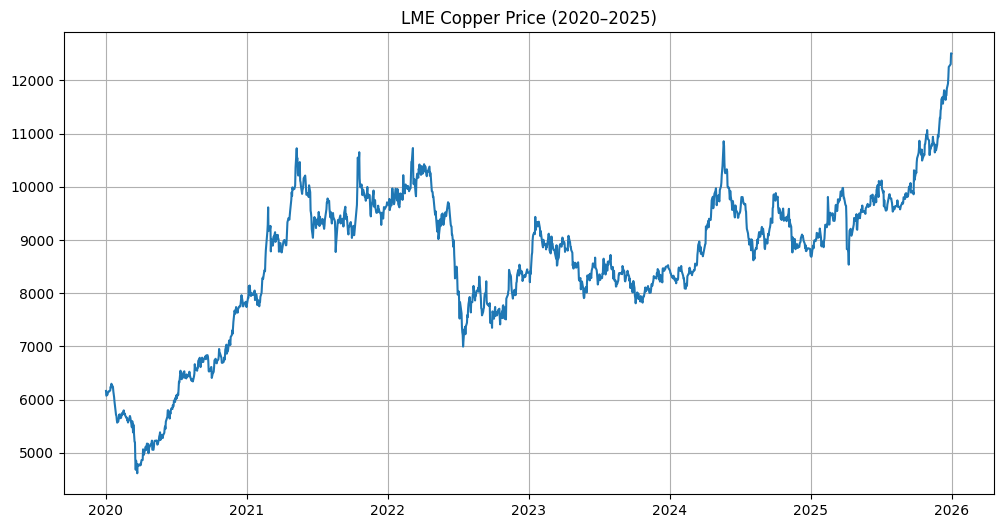

In [10]:

plt.figure(figsize=(12,6))
plt.plot(df_final.index, df_final["Price"])
plt.title("LME Copper Price (2020–2025)")
plt.grid(True)
plt.show()

C:\Users\otavi\AppData\Local\Temp\ipykernel_13088\3646715962.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal_preco = df_final["Price"].resample("M").mean()


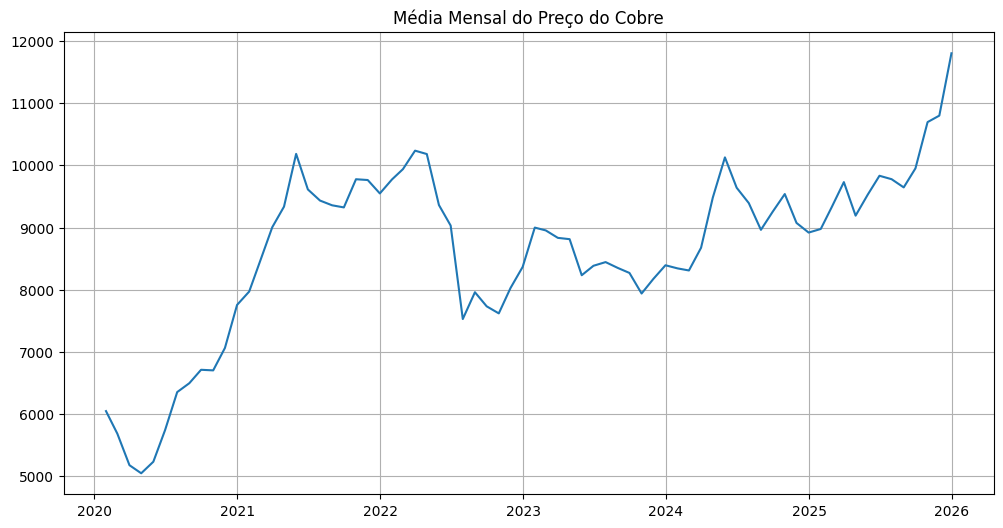

In [11]:
media_mensal_preco = df_final["Price"].resample("M").mean()

plt.figure(figsize=(12,6))
plt.plot(media_mensal_preco)
plt.title("Média Mensal do Preço do Cobre")
plt.grid(True)
plt.show()

C:\Users\otavi\AppData\Local\Temp\ipykernel_13088\4208032772.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  trimestral = df_final["Price"].resample("Q").last()


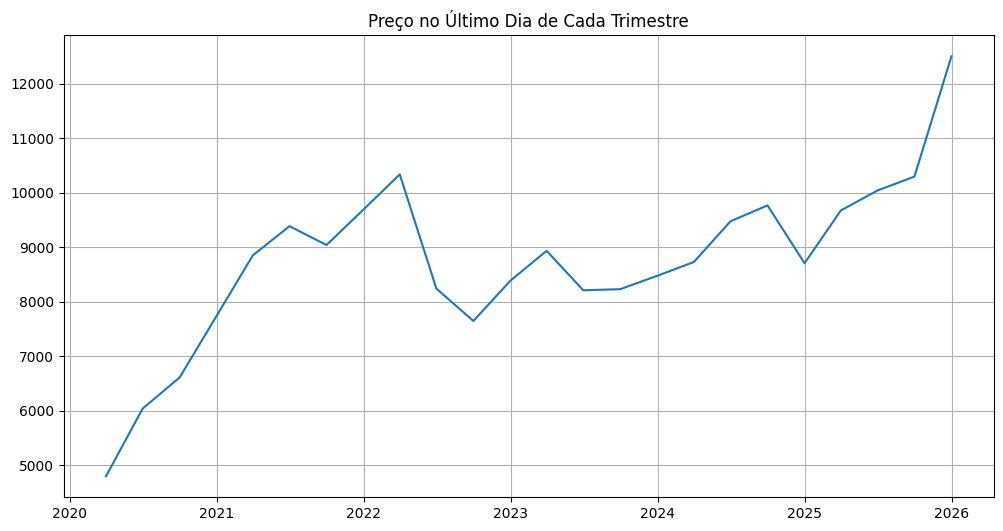

In [12]:
trimestral = df_final["Price"].resample("Q").last()

plt.figure(figsize=(12,6))
plt.plot(trimestral)
plt.title("Preço no Último Dia de Cada Trimestre")
plt.grid(True)
plt.show()

C:\Users\otavi\AppData\Local\Temp\ipykernel_13088\3456459673.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  variacao_anual = df_final["Price"].resample("Y").last().pct_change() * 100


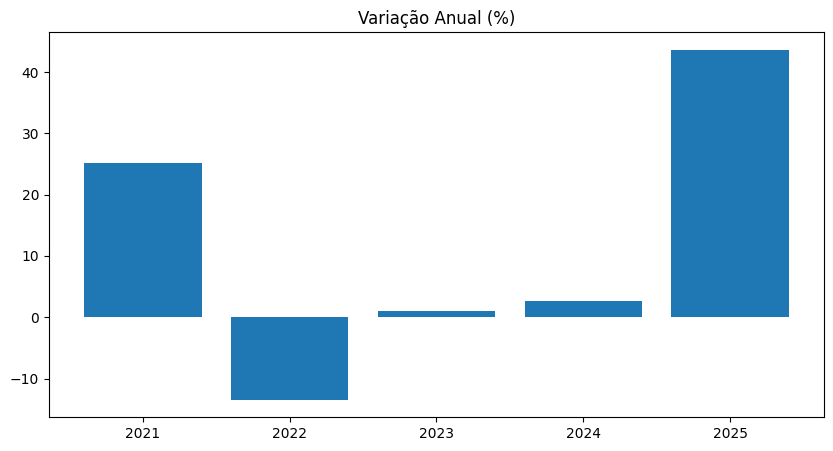

In [13]:
variacao_anual = df_final["Price"].resample("Y").last().pct_change() * 100

plt.figure(figsize=(10,5))
plt.bar(variacao_anual.index.year, variacao_anual.values)
plt.title("Variação Anual (%)")
plt.show()

## 7. Análise Sintética

Entre 2020 e 2025, o cobre apresentou forte valorização, refletindo
o choque inicial da pandemia seguido por recuperação impulsionada
por estímulos fiscais e monetários globais.

O período 2021–2022 foi marcado por forte demanda industrial,
restrições de oferta e aumento da demanda por eletrificação e
transição energética.

Em 2023 observou-se maior volatilidade, associada ao aperto
monetário global e fortalecimento do dólar.

Nos anos mais recentes, os preços se estabilizaram em patamar
superior ao pré-pandemia, sugerindo componente estrutural
na demanda pelo metal.